In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import transforms
import matplotlib
print(matplotlib.__version__)
print(matplotlib.__file__)
#from mpl_toolkits.mplot3d import Axes3D
import scipy.linalg as la
import scipy.sparse as sp
import cvxopt
import itertools
import scipy.ndimage as ndi
import scipy.spatial as spatial
from discretization import *
from utils import *
%matplotlib tk

3.0.3
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py


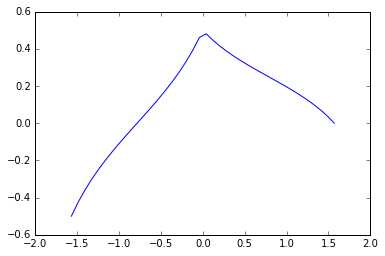

In [11]:
ns = [(angle,np.cos(angle), np.sin(angle)) for angle in np.linspace(-np.pi/2, np.pi/2, 40)]
a,n1,n2=zip(*ns)
n1=np.array(n1)
n2=np.array(n2)
plt.plot(a,(n1+np.clip(n2,None,0))/(2*(n1+np.abs(n2))))
plt.show()

In [12]:
np.clip([-1,-2,0,3],None,0)

array([-1, -2,  0,  0])

In [13]:
from scipy.interpolate import RegularGridInterpolator

In [14]:
gi = RegularGridInterpolator(2*[np.linspace(0,1,3)],np.array([np.eye(1,9,i) for i in range(9)]).reshape(3,3,-1))

In [15]:
gi._find_indices(np.array([[0.7,0.8]]))

([array([1, 1])], [array([0.4, 0.6])], array([False, False]))

In [16]:
np.array([np.eye(1,9,i) for i in range(9)]).reshape(3,3,-1)

array([[[1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1.]]])

In [17]:
gi([[0.7,0.8]])

array([[0.  , 0.  , 0.  , 0.  , 0.24, 0.36, 0.  , 0.16, 0.24]])

In [18]:
nu=np.load("nu.npy")
Ptheta_nu=np.load("ptheta_nu.npy")

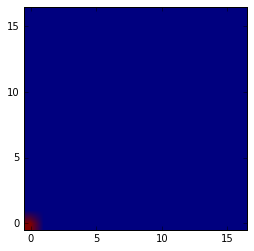

In [19]:
plt.imshow(nu[16,:].reshape(17,-1).transpose(), origin="lower")
plt.show()

(16,)


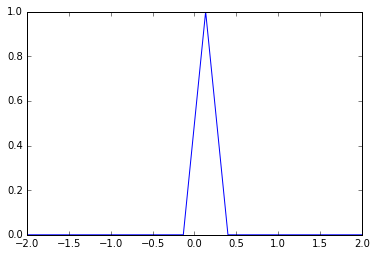

In [20]:
proj=Ptheta_nu[16][14]@nu[16,:]
print(proj.shape)
plt.plot(np.linspace(-2,2,16),proj)
plt.show()

In [21]:
mu=np.load("mu.npy")
Pn=np.load("pn.npy")

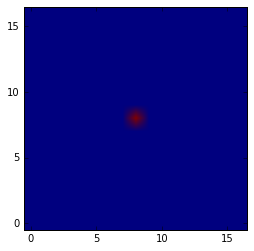

In [165]:
plt.imshow(nu[8,:].reshape(17,-1).transpose(),origin="lower")
plt.show()

In [23]:
a=np.zeros((4,5))
a[2,:]=np.array([[1,2,3,4,5]])
a

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [1., 2., 3., 4., 5.],
       [0., 0., 0., 0., 0.]])

In [24]:
import itertools

In [25]:
np.array(list(itertools.product([1,2,3],[4,5,6]))).reshape(3,3,-1)

array([[[1, 4],
        [1, 5],
        [1, 6]],

       [[2, 4],
        [2, 5],
        [2, 6]],

       [[3, 4],
        [3, 5],
        [3, 6]]])

(16,)


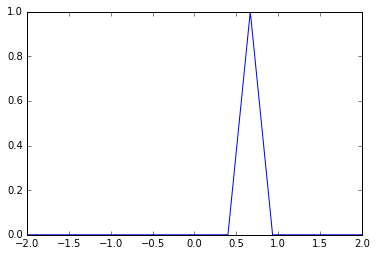

In [26]:
proj=Pn[8][12]@mu[12,:]
print(proj.shape)
plt.plot(np.linspace(-2,2,16),proj)
plt.show()

In [27]:
y=np.load("y.npy")
Msys=np.load("Msys.npy")
B=np.load("B.npy")

In [28]:
la.norm(Msys@np.hstack((mu.flatten(),nu.flatten()))-y)

5.284187084681871

In [29]:
res=np.load("res_20190417-125052.npy")

In [30]:
la.norm(Msys@res-y)

0.0005691772329188689

In [31]:
la.norm(Msys[:-B.shape[1],:]@np.hstack((mu.flatten(),nu.flatten())))

5.284187084681871

In [32]:
np.argwhere(y[:-B.shape[1]]!=0)

array([], shape=(0, 1), dtype=int64)

In [33]:
np.array([1,2,3,4])[:-3]

array([1])

In [34]:
y.shape,B.shape

((5185,), (1, 289, 289))

In [35]:
la.norm(Msys[:-B.shape[1],:]@res)

0.0003657641435022185

In [36]:
norms = []
for n in range(18):
    for d in range(17):
        norms.append(la.norm(Pn[n][d]@mu[d,:]-Ptheta_nu[n][d]@nu[n,:])**2)
        


In [37]:
norms[80]

1.9999999999999947

In [38]:
la.norm(Pn[4][12]@mu[12,:]-Ptheta_nu[4][12]@nu[4,:])**2

1.9999999999999947

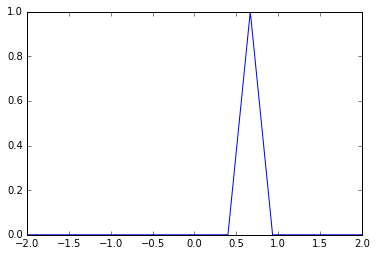

In [39]:
plt.plot(np.linspace(-2,2,16),Pn[4][12]@mu[12,:])
plt.show()

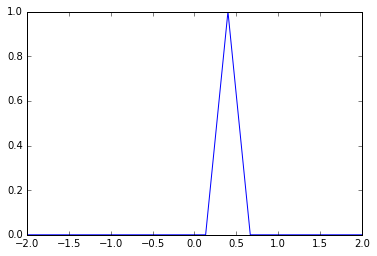

In [40]:
plt.plot(np.linspace(-2,2,16),Ptheta_nu[4][12]@nu[4,:])
plt.show()

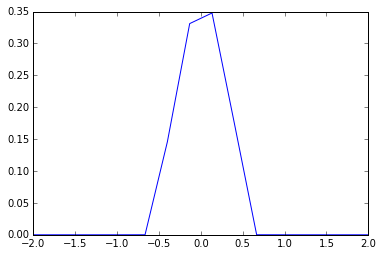

In [41]:
plt.plot(np.linspace(-2,2,16),Pn[4][12]@res[12*17*17:13*17*17])
plt.show()

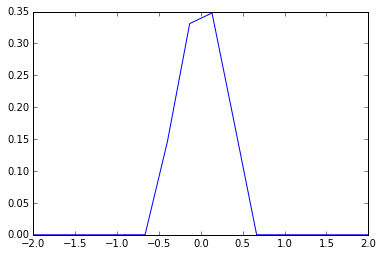

In [42]:
plt.plot(np.linspace(-2,2,16),Ptheta_nu[4][12]@res[21*17*17:22*17*17])
plt.show()

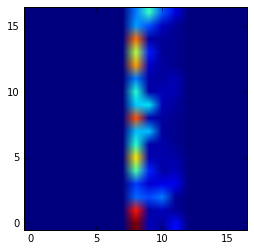

In [43]:
n=8
plt.imshow(res[n*17*17:(n+1)*17*17].reshape(17,-1).transpose(), origin="lower")
plt.show()

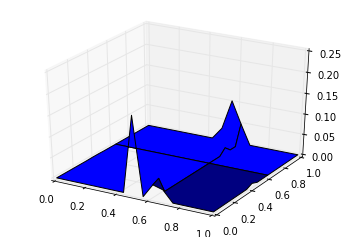

In [137]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
n=8
x=y=np.linspace(0,1,17)
x,y=np.meshgrid(x,y)
ax.plot_surface(x,y,res[n*17*17:(n+1)*17*17].reshape(17,-1).transpose())
plt.show()

In [51]:
np.unravel_index(np.argmax(nu[4,:]), (17,17))

(12, 12)

In [62]:
np.linspace(np.sin(-np.pi/4),np.cos(-np.pi/4),17)[12]*2*1/np.sqrt(2)

0.49999999999999994

In [59]:
1/np.sqrt(2)/2

0.35355339059327373

In [60]:
np.linspace(-2,2,17)

array([-2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,
        0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ])

In [63]:
np.unravel_index(np.argmax(mu[12,:]), (17,17))

(8, 0)

In [70]:
np.linspace(0,np.cos(np.pi/4)+np.sin(np.pi/4),17)[8]*np.cos(np.linspace(-np.pi/2,np.pi/2,17)[4])

0.5

In [77]:
np.argwhere(Pn[4][12][:,8*17]!=0)

array([[10]])

In [75]:
Pn[4][12][:,12]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [78]:
np.argwhere(Ptheta_nu[4][12][:,12*17+12]!=0)

array([[9]])

In [15]:
mu, nu = np.load("data/res_disc3_20190927-102354.npy", allow_pickle=True)
#print(mu.shape, nu.shape)
n=-2
plt.imshow(mu[n].transpose(), interpolation="none", origin="lower")
plt.colorbar()



In [13]:
mu, nu=np.load("data/res_20191009-161928.npy")
n=-2
plt.imshow(nu[n].transpose(), interpolation="none", origin="lower")
plt.colorbar()
plt.show()

In [15]:
%matplotlib tk
mu1, nu1=np.load("data/res_20191009-162257.npy")
mu2, nu2=np.load("data/res_20191009-162328.npy")
print(nu1.shape, nu2.shape)
n=5
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(nu1[-1].transpose(), interpolation="none", origin="lower")
plt.colorbar()
plt.subplot(122)
plt.imshow(nu2[-2].transpose(), interpolation="none", origin="lower")
plt.colorbar()
plt.show()

(1, 100, 100) (3, 60, 60)


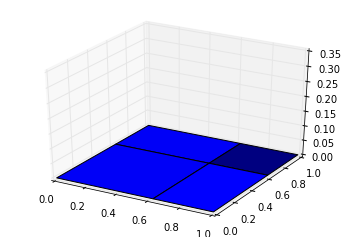

In [139]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
n=-3
x=y=np.linspace(0,1,17)
x,y=np.meshgrid(x,y)
ax.plot_surface(x,y,res[n*17*17:(n+1)*17*17].reshape(17,-1).transpose())
plt.show()

In [155]:
n=-3
um1 = res[n*17*17:(n+1)*17*17]
n=-2
u0 = res[n*17*17:(n+1)*17*17]
n=-1
up1 = res[n*17*17:]
um1[um1.nonzero()]
np.unravel_index(np.argwhere(um1>1e-2), (17,17))

(array([[ 4],
        [ 4],
        [12],
        [12]]), array([[ 4],
        [12],
        [ 4],
        [12]]))

In [148]:
B=np.load("Bf10.npy")
target=np.load("targetf10.npy")

In [173]:
target.size/3

882.0

In [174]:
la.norm(B[1]@u0-target[882:2*882])

0.026596853221343093

In [175]:
la.norm(B[1]@nu[8,:]-target[882:2*882])

0.0

In [176]:
la.norm(B[0]@um1-target[:882])

0.010455214160981146

In [190]:
la.norm(B[0]@nu[12,:].reshape(17,-1).transpose().flatten()-target[:882])

8.14414145684797e-14

In [171]:
np.array((1,2,3))/np.array((0.5,1,2))

array([2. , 2. , 1.5])

In [197]:
test=np.zeros(17*17)
#test[4*17+12]=1
test[12*17+4]=1

In [198]:
la.norm(B[0]@test-target[:882])

5.2099720072372927e-14

In [199]:
21*21

441

In [202]:
la.norm(B[0][:,80]-B[0][:,12*17+12])

5.2099720072372927e-14

In [209]:
print(np.exp(-2j*np.pi*2*(-0.5)))
np.exp(-2j*np.pi*2*(0.5))

(1-2.4492935982947064e-16j)


(1+2.4492935982947064e-16j)

In [44]:
cvxopt.spmatrix(0,None,[],(3,3))

TypeError: invalid type for I

In [50]:
2+np.arange(2)

array([2, 3])

In [3]:
np.prod((3,2))

6

In [4]:
A=np.array([[1,1,1,0,0,0,0,0,0,0],[0,0,0,1,1,1,0,0,0,0],[0,0,0,0,0,0,1,1,1,1]])

In [5]:
G=np.vstack((-np.eye(10),A))

In [8]:
G.T@G

array([[2., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 2., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 2., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 2., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 2., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 2., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 2., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 2., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 2., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 2.]])

In [9]:
A.T@A

array([[1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 1]])

In [2]:
a=cvxopt.matrix([[1e1,2],[3,0.0]])
b=cvxopt.matrix([[5,6],[7,8]])
c=cvxopt.sparse(b)

In [96]:
a[:]=[4,5,6,8]

In [97]:
print(np.array(a))

[[4. 6.]
 [5. 8.]]


In [92]:
np.allclose(a,cvxopt.matrix(c))

False

In [70]:
np.array_equal(np.array(a),np.array(c))

False

In [76]:
np.array(c).dtype

dtype('O')

In [215]:
a=cvxopt.spmatrix([1,0],[0,1],[0,1],(3,3))
b=cvxopt.spmatrix([3,4],[0,0],[0,1],(3,3))
c=cvxopt.spmatrix(0,[0,2,1],[0,1,1],(3,3))

In [216]:
b=a
b-=a
b+=c

In [217]:
print(b)
print(cvxopt.sparse(b))

[ 0.00e+00     0         0    ]
[    0      0.00e+00     0    ]
[    0      0.00e+00     0    ]

[0 0 0]
[0 0 0]
[0 0 0]



In [199]:
print(b)

[ 0.00e+00     0         0    ]
[    0     -0.00e+00     0    ]
[    0         0         0    ]



In [25]:
print(c)

[ 6.00e+00  6.00e+00  6.00e+00]
[    0      6.00e+00     0    ]
[    0         0      6.00e+00]



In [78]:
A=cvxopt.matrix([[1,1,1,0,0,0,0,0,0],[0,0,0,1,1,1,0,0,0],[0,0,0,0,0,0,1,1,1]]).T
print(A)

[ 1  1  1  0  0  0  0 ... ]
[ 0  0  0  1  1  1  0 ... ]
[ 0  0  0  0  0  0  1 ... ]



In [88]:
lmat = cvxopt.sparse(A.T*cvxopt.spdiag([1,2,3])*A)
lmat[0,4]=1
lmat[list(range(6))]=1
lmat[7,list(range(6))]=1
print(lmat)

[ 1.00e+00  1.00e+00  1.00e+00     0      1.00e+00     0         0     ... ]
[ 1.00e+00  1.00e+00  1.00e+00     0         0         0         0     ... ]
[ 1.00e+00  1.00e+00  1.00e+00     0         0         0         0     ... ]
[ 1.00e+00     0         0      2.00e+00  2.00e+00  2.00e+00     0     ... ]
[ 1.00e+00     0         0      2.00e+00  2.00e+00  2.00e+00     0     ... ]
[ 1.00e+00     0         0      2.00e+00  2.00e+00  2.00e+00     0     ... ]
[    0         0         0         0         0         0      3.00e+00 ... ]
[ 1.00e+00  1.00e+00  1.00e+00  1.00e+00  1.00e+00  1.00e+00  3.00e+00 ... ]
[    0         0         0         0         0         0      3.00e+00 ... ]



In [53]:
print(cvxopt.sparse(cvxopt.matrix(np.array([[1,2,3,0],[4,5,6,0]]))).CCS[0])

[ 0]
[ 2]
[ 4]
[ 6]
[ 6]



In [74]:
print(A[cvxopt.matrix([[0,1],[2,2]])])

[ 1]
[ 1]
[ 0]
[ 0]



In [41]:
print(a.CCS[0])

[ 0]
[ 1]
[ 2]
[ 2]



In [142]:
grid_size=3
sz = lmat.size[0]
ssz = 3
col_ptrs, row_ids, vals = lmat.CCS
row_ids = np.array(row_ids).flatten()
indices = np.empty((ssz, grid_size*grid_size), dtype=int)
diag_indices = np.empty(sz)
for v in range(ssz):
    for c in range(grid_size):
        col_start = col_ptrs[int(v*grid_size+c)]
        col_end = col_ptrs[int(v*grid_size+c+1)]
        window = row_ids[col_start:col_end]
        row_start = np.searchsorted(window, v*grid_size)
        indices[v, c*grid_size:(c+1)*grid_size] = col_start+row_start+np.arange(grid_size)
        diag_indices[v*grid_size+c] = col_start+row_start+c

indices = indices.flatten()
print(diag_indices)
len(lmat.V)

[ 0.  8. 13. 15. 21. 26. 28. 32. 36.]


37

In [118]:
ass = np.zeros(len(lmat))
indices=indices.astype(int)
np.repeat(cvxopt.matrix([42,43,44]),grid_size*grid_size)

array([42, 42, 42, 42, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 43, 43, 43,
       43, 44, 44, 44, 44, 44, 44, 44, 44, 44])

In [114]:
ass[indices.flatten()]=np.repeat(cvxopt.matrix([42,43,44]),grid_size*grid_size)
ass.reshape(len(ass),1)

array([[42.],
       [42.],
       [42.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [42.],
       [42.],
       [42.],
       [ 0.],
       [42.],
       [42.],
       [42.],
       [ 0.],
       [43.],
       [43.],
       [43.],
       [ 0.],
       [ 0.],
       [43.],
       [43.],
       [43.],
       [ 0.],
       [43.],
       [43.],
       [43.],
       [ 0.],
       [44.],
       [44.],
       [44.],
       [44.],
       [44.],
       [44.],
       [44.],
       [44.],
       [44.]])

In [115]:
lmat.V += ass.reshape(len(ass),1)

TypeError: invalid assignment for V attribute

In [108]:
print(lmat)

[ 8.40e+01  8.40e+01  8.40e+01     0      0.00e+00     0         0     ... ]
[ 8.40e+01  8.40e+01  8.40e+01     0         0         0         0     ... ]
[ 8.40e+01  8.40e+01  8.40e+01     0         0         0         0     ... ]
[ 0.00e+00     0         0      8.60e+01  8.60e+01  8.60e+01     0     ... ]
[ 0.00e+00     0         0      8.60e+01  8.60e+01  8.60e+01     0     ... ]
[ 0.00e+00     0         0      8.60e+01  8.60e+01  8.60e+01     0     ... ]
[    0         0         0         0         0         0      8.80e+01 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  8.80e+01 ... ]
[    0         0         0         0         0         0      8.80e+01 ... ]



In [109]:
np.repeat([42,43,44],5)

array([42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 44, 44, 44, 44, 44])

TypeError: invalid dimension tuple

In [124]:
z=np.array([1,2,3])
m=cvxopt.matrix(z)
z=np.array(m)

In [143]:
np.empty(3,dtype=int)

array([34, 35, 36])

In [139]:
test = cvxopt.matrix(np.arange(11))
lmat[::10]+=np.arange(9)

TypeError: invalid inplace operation

In [136]:
print(lmat)

[ 0.00e+00  8.40e+01  8.40e+01     0      0.00e+00     0         0     ... ]
[ 8.40e+01  1.00e+00  8.40e+01     0         0         0         0     ... ]
[ 8.40e+01  8.40e+01  2.00e+00     0         0         0         0     ... ]
[ 0.00e+00     0         0      3.00e+00  8.60e+01  8.60e+01     0     ... ]
[ 0.00e+00     0         0      8.60e+01  4.00e+00  8.60e+01     0     ... ]
[ 0.00e+00     0         0      8.60e+01  8.60e+01  5.00e+00     0     ... ]
[    0         0         0         0         0         0      6.00e+00 ... ]
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  8.80e+01 ... ]
[    0         0         0         0         0         0      8.80e+01 ... ]



In [156]:
z=cvxopt.matrix([1,2,3])

In [157]:
a=np.array([3,4,5,6])

In [158]:
a[[0,1,2]] += z.T

ValueError: non-broadcastable output operand with shape (3,) doesn't match the broadcast shape (1,3)

In [218]:
l=np.linspace(0,1,4)

In [227]:
dirs = np.array([(np.cos(angle), np.sin(angle))
                   for angle in np.linspace(-np.pi/2, np.pi/2, 3)])
dirs
np.array(list(itertools.product(l,l)))

array([[0.        , 0.        ],
       [0.        , 0.33333333],
       [0.        , 0.66666667],
       [0.        , 1.        ],
       [0.33333333, 0.        ],
       [0.33333333, 0.33333333],
       [0.33333333, 0.66666667],
       [0.33333333, 1.        ],
       [0.66666667, 0.        ],
       [0.66666667, 0.33333333],
       [0.66666667, 0.66666667],
       [0.66666667, 1.        ],
       [1.        , 0.        ],
       [1.        , 0.33333333],
       [1.        , 0.66666667],
       [1.        , 1.        ]])

In [233]:
dots=dirs.dot(np.array(list(itertools.product(l,l))).transpose())

In [231]:
rads=np.linspace(-2,2,30)

In [272]:
i=np.searchsorted(rads, dots, side="right")-1
i.dtype

dtype('int64')

In [285]:
P=np.zeros((3,16,30))
a=np.repeat([0,1,2],16).reshape(3,16)
b=np.tile(range(16),3).reshape(3,16)
b

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]])

In [262]:
P[a,b,i]=1

In [264]:
P[0][1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [281]:
i.choose(P)=1

SyntaxError: can't assign to function call (<ipython-input-281-4f2b1d298889>, line 1)

In [275]:
i.shape

(3, 16)

In [278]:
val_arr = np.arange(27).reshape(3,3,3)
z_indices = np.array([[1,0,2],
                      [0,0,1],
                      [2,0,1]])
val_arr

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

In [277]:
z_indices.choose(val_arr)

array([[ 9,  1, 20],
       [ 3,  4, 14],
       [24,  7, 17]])

In [295]:
y,x = np.ogrid[0:16,0:3]
print(y)
P[x,y,i.transpose()]=1
P[0][0]

[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [296]:
i.shape

(3, 16)

In [3]:
np.array([1,2,3])+np.array([[4],[5],[6]])

array([[5, 6, 7],
       [6, 7, 8],
       [7, 8, 9]])

In [4]:
x=np.linspace(0,1,4)

In [10]:
a=x+x[:,np.newaxis]
b=-x+x[:,np.newaxis]

In [12]:
np.column_stack((a.flatten(),b.flatten()))

array([[ 0.        ,  0.        ],
       [ 0.33333333, -0.33333333],
       [ 0.66666667, -0.66666667],
       [ 1.        , -1.        ],
       [ 0.33333333,  0.33333333],
       [ 0.66666667,  0.        ],
       [ 1.        , -0.33333333],
       [ 1.33333333, -0.66666667],
       [ 0.66666667,  0.66666667],
       [ 1.        ,  0.33333333],
       [ 1.33333333,  0.        ],
       [ 1.66666667, -0.33333333],
       [ 1.        ,  1.        ],
       [ 1.33333333,  0.66666667],
       [ 1.66666667,  0.33333333],
       [ 2.        ,  0.        ]])

In [2]:
std_grid1 = np.linspace(0, 1, 4)
std_grid = np.array(list(itertools.product(std_grid1, std_grid1)))

In [3]:
std_grid

array([[0.        , 0.        ],
       [0.        , 0.33333333],
       [0.        , 0.66666667],
       [0.        , 1.        ],
       [0.33333333, 0.        ],
       [0.33333333, 0.33333333],
       [0.33333333, 0.66666667],
       [0.33333333, 1.        ],
       [0.66666667, 0.        ],
       [0.66666667, 0.33333333],
       [0.66666667, 0.66666667],
       [0.66666667, 1.        ],
       [1.        , 0.        ],
       [1.        , 0.33333333],
       [1.        , 0.66666667],
       [1.        , 1.        ]])

In [6]:
rot45 = 0.5*np.array([[1, 1], [-1, 1]])
rot_grid = std_grid@rot45.transpose()
rot_grid+(1,0)

array([[ 1.        ,  0.        ],
       [ 1.16666667,  0.16666667],
       [ 1.33333333,  0.33333333],
       [ 1.5       ,  0.5       ],
       [ 1.16666667, -0.16666667],
       [ 1.33333333,  0.        ],
       [ 1.5       ,  0.16666667],
       [ 1.66666667,  0.33333333],
       [ 1.33333333, -0.33333333],
       [ 1.5       , -0.16666667],
       [ 1.66666667,  0.        ],
       [ 1.83333333,  0.16666667],
       [ 1.5       , -0.5       ],
       [ 1.66666667, -0.33333333],
       [ 1.83333333, -0.16666667],
       [ 2.        ,  0.        ]])

In [7]:
len(np.array([[1,2],[3,4]]))

2

In [8]:
min(1-0,3-1)

1

In [34]:
a=np.arange(12).reshape(2,2,3)
a

array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]]])

In [35]:
a[:,1]

array([[ 3,  4,  5],
       [ 9, 10, 11]])

In [2]:
a=cvxopt.matrix([1,2,3,4],(4,1))

In [4]:
np.array(a)

array([[1],
       [2],
       [3],
       [4]])

In [6]:
a=np.array([1,2,3,4,5,6,7,8])
print(a)

[1 2 3 4 5 6 7 8]


In [7]:
a.reshape(2,2,2)

array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]])

In [17]:
a=np.empty((2,3),dtype=object)

In [18]:
for i in range(2):
    for j in range(3):
        a[i,j]=sp.coo_matrix([1,2,3,4])

In [21]:
a

array([[<1x4 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in COOrdinate format>,
        <1x4 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in COOrdinate format>,
        <1x4 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in COOrdinate format>],
       [<1x4 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in COOrdinate format>,
        <1x4 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in COOrdinate format>,
        <1x4 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in COOrdinate format>]], dtype=object)

In [22]:
b=np.empty((2,),dtype=object)

In [24]:
b[0]=sp.coo_matrix([1,2,3,4])
b[1]=sp.coo_matrix([1,2,3,0])

In [27]:
sp.vstack(b)

<2x4 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in COOrdinate format>

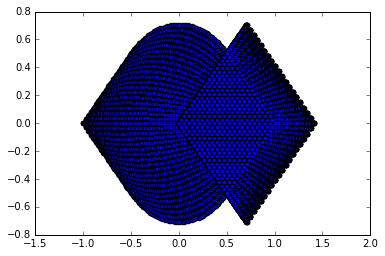

In [44]:
nd=100
dirs = np.array([(np.cos(angle), np.sin(angle))
                              for angle in np.linspace(-np.pi/2, np.pi/2, nd)])
#print(dirs)
std_grid1 = np.linspace(0, 1, 20)
std_grid = np.array(list(itertools.product(std_grid1, std_grid1)))
rot45 = 0.5*np.array([[1, 1], [-1, 1]])
rot_grid = std_grid@rot45.transpose()
res = np.empty((nd, len(std_grid), 2))
for di, d in enumerate(dirs):
    if d[1]>0:
        res[di] = rot_grid*np.sum(d)
    else:
        res[di] = rot_grid*(d[0]-d[1]) + (d[1],0)
    plt.scatter(res[di,:,0], res[di,:,1])
    #print(np.min(res[di,:,0]), np.max(res[di,:,0]), np.min(res[di,:,1]), np.max(res[di,:,1]))
    
plt.show()

In [14]:
a=sp.coo_matrix(np.arange(4).reshape(2,2))

In [21]:
a.multiply([1,2]).todense()

matrix([[0, 2],
        [2, 6]], dtype=int64)

In [16]:
b = np.arange(4).reshape(2,2)

In [19]:
a.multiply(b[:,1]).todense()

matrix([[0, 3],
        [2, 9]], dtype=int64)

In [2]:
a=np.array([1,2])
b=np.array([3,4])

In [9]:
np.all((a,b)<=5)

TypeError: unorderable types: tuple() <= int()

In [57]:
mu, nu =np.load("data/res_20190430-171329.npy")

In [58]:
u0 = nu[-2]
u0[u0<1e-3]=0

In [59]:
s = np.ones((3,3))
labelled, numfeats = ndi.label(u0, structure=s)
indices = [np.nonzero(labelled == k) for k in np.unique(labelled)[1:]]

In [60]:
numfeats, indices

(19,
 [(array([38, 38, 39, 39]), array([50, 51, 50, 51])),
  (array([39, 40]), array([71, 71])),
  (array([39, 40]), array([78, 78])),
  (array([47, 48, 48]), array([61, 60, 61])),
  (array([47, 47, 48, 48]), array([91, 92, 91, 92])),
  (array([48, 49]), array([86, 86])),
  (array([49, 50, 50]), array([40, 40, 41])),
  (array([50, 51, 51]), array([49, 49, 50])),
  (array([50, 50]), array([56, 57])),
  (array([62, 62, 63, 63]), array([45, 46, 45, 46])),
  (array([62, 62, 63, 63]), array([72, 73, 72, 73])),
  (array([67, 67, 68]), array([46, 47, 46])),
  (array([69, 69, 70, 70]), array([86, 87, 86, 87])),
  (array([73, 73, 74, 74]), array([77, 78, 77, 78])),
  (array([77, 78, 78]), array([84, 83, 84])),
  (array([80, 80, 81]), array([55, 56, 55])),
  (array([84, 85, 85]), array([60, 60, 61])),
  (array([84, 84, 85]), array([67, 68, 68])),
  (array([87, 88, 88]), array([55, 55, 56]))])

In [61]:
np.unique(labelled)[1:]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19], dtype=int32)

In [64]:
com = ndi.measurements.center_of_mass(u0, labelled, 1+np.arange(numfeats))
list(zip(*com))
_,gt,_ = np.load("data/gt_20190430-165348.npy")

In [66]:
plt.imshow(u0.transpose(), interpolation="none", origin="lower")
plt.colorbar()
plt.scatter(*zip(*com))
plt.scatter(gt[0], gt[1])
#plt.show()

In [65]:
gt

array([[ 2.57035964e-01,  2.26967632e-01,  5.52049445e-01,
         8.28930362e-01,  7.87434858e-01,  8.42807562e-02,
         5.15495482e-01,  7.73731217e-01,  9.44940410e-02,
         4.52312885e-01,  2.14672679e-01,  2.66178482e-01,
         2.30236661e-01,  4.46725176e-01,  6.60959532e-01,
         7.12869092e-01,  1.04551815e-01,  6.77959526e-01,
         6.10455701e-01,  2.56389957e-01],
       [ 1.09716099e-01,  4.16029996e-01,  8.17789672e-01,
         3.33905732e-01,  4.10569270e-01,  2.61949642e-01,
         2.01194610e-01,  5.26189328e-01,  5.75951988e-01,
         1.95860001e-01,  8.85971322e-01,  2.48611685e-01,
         8.04178473e-01,  6.04599607e-01,  9.67086841e-01,
         3.35949572e-01,  6.81971643e-01,  7.71990022e-01,
         6.79301079e-01,  3.57843721e-01],
       [ 7.72717966e-03,  1.13377524e-01,  1.50518149e-01,
        -1.58641252e-01, -5.98177037e-02, -2.53384733e-03,
        -9.05112708e-02,  2.71553854e-03,  4.86021869e-02,
         1.01084066e-01, -6.6

In [3]:
res=np.load("data/sf_20190520-153217.npy")
gs=100
n=0
plt.imshow(res[n*gs*gs:None if n == -1 else (n+1)*gs*gs].reshape(gs,-1).transpose(), interpolation="none", origin="lower")
plt.colorbar()
plt.show()

In [13]:
def list_of_sources(img):
    img[img<1e-3] = 0
    labelled, num_sources = ndi.label(img, structure=np.ones((3,3)))
    com = np.array(ndi.center_of_mass(img, labelled, 1+np.arange(num_sources)))
    com /= img.shape[0]-1
    #com *= right-left
    #com += left
    # print(com)
    return com
    # g = np.empty((disc.grid_size_nu, disc.grid_size_nu), dtype=object)
    # g[:] = disc.nu_grid.reshape(disc.grid_size_nu, disc.grid_size_nu, 2)
    # # print(disc.nu_grid.reshape(disc.grid_size_nu, disc.grid_size_nu, 2))
    # return ndimage.interpolation.map_coordinates(disc.nu_grid.reshape(disc.grid_size_nu, disc.grid_size_nu, 2), com.transpose())

In [14]:
list_of_sources(res.reshape(100,100))

array([[0.30003904, 0.39999434],
       [0.50001946, 0.50003083]])

In [23]:
res=np.load("data/fg_20190523-182811.npy")
res[res<1e-2]=0

gs=9
n=1
res = res.reshape(gs, gs, gs, gs)
print(np.argwhere(res>0))
plt.imshow(res[:,:,3,5].transpose(), interpolation="none", origin="lower")
plt.colorbar()
plt.show()

[[4 4 4 4]]


In [4]:
grid1 = np.linspace(0,1,3)

In [5]:
a = np.empty(9, dtype=object)
a[:] = list(itertools.product(grid1, grid1))

In [6]:
a.reshape(3,3)

array([[(0.0, 0.0), (0.0, 0.5), (0.0, 1.0)],
       [(0.5, 0.0), (0.5, 0.5), (0.5, 1.0)],
       [(1.0, 0.0), (1.0, 0.5), (1.0, 1.0)]], dtype=object)

In [8]:
a=np.arange(10).reshape(2,5)

In [12]:
a += 1

In [13]:
a

array([[ 2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11]])

In [14]:
from utils import *

In [15]:
img = np.array(([0,0,0,0],
                [0,1,1,0],
                [0,1,1,0],
                [0,1,1,0]))

In [25]:
los = list_of_sources(img.transpose())
print(los)

[[0.5   0.625]]


In [29]:
plt.imshow(img)
plt.plot(*(los[0]*img.shape[0]-1), "x")

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

In [37]:
"{:.1f}".format(12.3333)

'12.3'

In [12]:
total_dofs = 3
data = np.full(2*total_dofs, -1)
I = np.arange(2*total_dofs)
J = np.repeat(np.arange(total_dofs), 2)

In [16]:
sp.coo_matrix((data, (I, J))).A

array([[-1,  0,  0],
       [-1,  0,  0],
       [ 0, -1,  0],
       [ 0, -1,  0],
       [ 0,  0, -1],
       [ 0,  0, -1]])

In [18]:
np.tile([+1,-1], total_dofs)

array([ 1, -1,  1, -1,  1, -1])

In [27]:
sp.block_diag(total_dofs*[[1,1]]).A

array([[1, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 1, 1]], dtype=int64)

In [28]:
total_dofs*[[1,1]]

[[1, 1], [1, 1], [1, 1]]

In [43]:
dofs_per_var = [2,3]
total_dofs = np.sum(dofs_per_var)
def build_l1_constr():
    # need one additional var |x| for each dof x which represents absolute value of that dof
    # use constraints -|x| <= x <= |x|
    # block of new abs vars is ordered in front of real vars
    print("l1constr", total_dofs)
    # idx = total_dofs*[[[-1],[-1]]]
    data = np.full(2*total_dofs, -1)
    I = np.arange(2*total_dofs)
    J = np.repeat(np.arange(total_dofs), 2)
    print("idx")
    # abs_part = sp.block_diag(idx)
    abs_part = sp.coo_matrix((data, (I, J)))
    print("abs_part")
    data = np.tile([1, -1], total_dofs)
    I = np.arange(2*total_dofs)
    J = np.repeat(np.arange(total_dofs), 2)
    dof_part = sp.coo_matrix((data, (I, J)))
    # dof_part = sp.block_diag(total_dofs*[[[+1],[-1]]])
    print("dof_part")
    abs_ineq = sp.hstack((abs_part, dof_part))
    print("abs_ineq")

    # sum up absolute values for each var
    sum_mat = sp.block_diag([dofs*[1] for dofs in dofs_per_var])
    print("sum_mat")
    print(abs_ineq.shape, sum_mat.shape)
    blocks = np.asarray([[abs_ineq],
                          [sum_mat, None]], dtype='object')
    print(blocks, blocks.ndim)
    constr_mat = sp.bmat([[abs_ineq],
                          [sum_mat, None]]) # zeros in bottom right because vars without abs are not summed
    

In [44]:
build_l1_constr()

l1constr 5
idx
abs_part
dof_part
abs_ineq
sum_mat
(10, 10) (2, 5)
[list([<10x10 sparse matrix of type '<class 'numpy.int64'>'
	with 20 stored elements in COOrdinate format>])
 list([<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in COOrdinate format>, None])] 1


ValueError: blocks must be 2-D

In [2]:
a = [(0.1, 0.1), (0.6, 0.6), (0.9, 0.9)]

In [17]:
def torusdist(v, w):
    return np.max(np.minimum(np.abs(v-w), 1-np.abs(v-w)))

print(np.min(spatial.distance.pdist(a, torusdist)))
print(torusdist(np.array([0.1,0.5]),np.array([0.9,0.2])))

0.19999999999999996
0.3


In [21]:
np.random.rand(2)-0.5

array([ 0.35682477, -0.02648005])

In [31]:
_, sources, weights = np.load("data/gt_maxsep0.01_2parts/gt_4.npy")
plt.scatter(sources[:,0], sources[:,1])
min_torus_sep(sources[:,:2])

0.005636371581001942

In [3]:
def mu_transform(theta):
    if theta[1]>0:
        return np.sum(theta)/np.sqrt(2), (0,0)
    else:
        return (theta[0]-theta[1])/np.sqrt(2), (theta[1], 0)
    
def mu_mpl_transform(theta):
    scal, off = mu_transform(theta)
    return transforms.Affine2D().rotate_deg(-45).scale(scal).translate(*off)
        

In [2]:
def extent_from_gs(gs):
    real_x = real_y = np.linspace(0,1,gs)
    dx = (real_x[1]-real_x[0])/2.
    dy = (real_y[1]-real_y[0])/2.
    return [real_x[0]-dx, real_x[-1]+dx, real_y[0]-dy, real_y[-1]+dy]

In [87]:
%matplotlib tk
discstr = "disc3rad100"
disc = Discretization(
    tau = 1,
    K = 1,
    num_dirs = 30,
    num_rads = 100,
    num_extra_ns = 0,
    grid_size_nu = 100,
    grid_size_mu = 100,
    adaptive_grids=True
)
i = 7
th = 26
tr = mu_mpl_transform(disc.dirs[th])
print("dir",disc.dirs[th])
_, actual_sources, weights = np.load("data/gt_maxsep0.03_2parts/gt_{}.npy".format(i))
print(actual_sources, weights)
mu, nu=np.load("data/gt_maxsep0.03_2parts/{}/res_{}_{}.npy".format(discstr, discstr, i))
plt.figure(figsize=(10,10))
extent = extent_from_gs(100)
#print("ex", extent)
bbox = transforms.Bbox.from_extents(np.array(extent).reshape(2,-1).transpose().flatten())
trbox = transforms.Bbox.null()
trbox.update_from_data_xy(tr.transform(bbox.corners()))
#print(bbox, trbox)
trex = tr.transform([(0,0),(1,0),(1,1),(0,1)])
xmin, xmax = np.min(trex[:,0]), np.max(trex[:,0])
ymin, ymax = np.min(trex[:,1]), np.max(trex[:,1])
#print("trex",[xmin, xmax, ymin, ymax])

img = plt.imshow(mu[th].transpose(), interpolation="none", origin="lower", extent=extent, transform=tr+plt.gca().transData)
#print("ex", img.get_extent())
#img.set_extent([xmin, xmax, ymin, ymax])
#plt.xlim(0)
plt.colorbar()
for s in actual_sources:
    jrad = [disc.dirs[th]@s[:2], disc.dirs[th]@s[2:]]
    print(jrad)
    plt.plot([jrad[0]], [jrad[1]], marker="o", fillstyle="none")

#plt.gca().relim()
#print(plt.gca().get_xlim())
#plt.gca().autoscale_view()
#plt.autoscale()
plt.xlim(trbox.x0, trbox.x1)
#print(trbox.x0, trbox.x1)
plt.ylim(trbox.y0, trbox.y1)
plt.show()

dir [0.31930153 0.94765317]
[[ 0.53950749  0.49126284 -0.09521432  0.42303554]
 [ 0.5630849   0.50045296  0.435029    0.43921293]] [0.9634818  1.09571136]
[0.6378123570283066, 0.37048889537649243]
[0.6540497031624561, 0.555126947432878]


In [6]:
fc = 5
def dirichlet(z):
    res = np.ones_like(z)
    for l in range(1,fc+1):
        res += 2*np.cos(2*np.pi*l*z)
    return res

In [12]:
i = 315
_, actual_sources, weights = np.load("data/gt_sep0.03-0.06_2parts/gt_{}.npy".format(i))
#actual_sources = [[0.7, 0.7], [0.5, 0.5]]
#actual_sources = [[0.5, 0.5]]
print(actual_sources, weights)
def conv(z1, z2):
    res = 0
    for s, w in zip(actual_sources, weights):
        dix = dirichlet(z1-s[0])
        diy = dirichlet(z2-s[1])
        res += w*dix*diy
    return res
zs = np.linspace(0,1,1000)
z1, z2 = np.meshgrid(zs, zs)
plt.contourf(z1, z2, conv(z1,z2))
for s in actual_sources:
    plt.plot([s[0]], [s[1]], marker="o", fillstyle="none")

[[ 0.41943597  0.78023848 -0.15856988 -0.20380996]
 [ 0.44535811  0.81025662 -0.20465518  0.03966392]] [0.99631302 0.90335449]


In [4]:
sep = np.empty(400)
for i in range(400):
    _, actual_sources, weights = np.load("data/gt_sep0.03-0.06_2parts/gt_{}.npy".format(i+1))
    sep[i] = min_torus_sep(actual_sources[:,:2])

In [5]:
sor = np.argsort(sep)
for j in sor:
    print(j, sep[j])

314 0.030018145275920394
145 0.030105147762115148
231 0.03026859775725499
78 0.030506489527123648
300 0.030610631325363125
309 0.030633162846757434
36 0.030829141299457796
138 0.030894692407144375
335 0.03099235444877979
185 0.031088280656920375
249 0.031142041811564103
169 0.031174485352251757
245 0.031392085419084115
191 0.031846628527067655
379 0.03198951309213205
220 0.032004609307875964
128 0.03200567210360361
93 0.03210312408846561
298 0.032128194174463
236 0.03214799588171424
225 0.032350374513914315
272 0.03249576101802043
275 0.03250792517029821
24 0.032553903763993364
142 0.03257339867086817
16 0.03264477036828495
27 0.032671762004812255
80 0.033305739068578366
35 0.033368429798592336
183 0.03349269443979774
140 0.033659405567516676
292 0.03371826779334064
76 0.03376250925713664
167 0.03378066309290051
375 0.0340640615869231
18 0.034090940412116466
101 0.03418965341849223
161 0.03427710650603899
360 0.03442621359065001
81 0.03450672121499043
30 0.03451500377229588
197 0.03452

In [2]:
folder = "data/gt_4-20parts_uniformsep/sep0-0.1/"

In [33]:
disc = Discretization(
    tau = 1,
    K = 1,
    num_dirs = 30,
    num_rads = 100,
    num_extra_ns = 0,
    grid_size_nu = 100,
    grid_size_mu = 100,
    adaptive_grids=True
)
i = 6
_, actual_sources, weights = np.load("{}gt_{}.npy".format(folder,i), allow_pickle=True)
print(actual_sources, weights)
for k in range(-1,2):
    pos = actual_sources[:,:2] + k*actual_sources[:,2:]
    print(k, min_torus_sep(pos))
#discstr = "single"
mu, nu=np.load("{}disc3-fc3/res_{}.npy".format(folder,i), allow_pickle=True)
#n = 0 if len(nu)==1 else -2
n = 0
plt.figure(figsize=(10,10))
plt.imshow(nu[n].transpose(), interpolation="none", extent=extent_from_gs(100), origin="lower")
plt.colorbar()
plt.show()
los = list_of_sources(nu[n], zero_threshold=1e-1)
for s in actual_sources:
    pos = s[:2] + (n-1)*s[2:]
    plt.plot([pos[0]], [pos[1]], marker="o", fillstyle="none", color="green", markeredgewidth=4)
for s in los:
    plt.plot([s[0]], [s[1]], marker="x", fillstyle="none", color="red")

[[ 0.08645771  0.42876891 -0.03864425 -0.41998286]
 [ 0.90190254  0.21678037 -0.06490799 -0.09321392]
 [ 0.09298112  0.6537082   0.03801203 -0.19629751]
 [ 0.47375094  0.82440535 -0.18087325 -0.03679081]
 [ 0.2121098   0.51459082 -0.15515606 -0.19791687]
 [ 0.44906907  0.66653774 -0.40808467 -0.21535182]
 [ 0.16360896  0.13672836 -0.12159555  0.01843635]
 [ 0.46572868  0.44625516  0.15601546  0.19737459]
 [ 0.57324301  0.2659339  -0.02886284  0.16041481]
 [ 0.70221248  0.36498519 -0.2390798  -0.32352306]
 [ 0.81182268  0.59801273  0.17858995  0.2673707 ]
 [ 0.49327562  0.39340165 -0.15953014 -0.27057652]
 [ 0.60488426  0.4528216   0.38028212 -0.11877258]
 [ 0.74039273  0.37653007  0.19684398  0.29368668]
 [ 0.45090247  0.38747639 -0.41800218  0.12516921]
 [ 0.68969372  0.21374396 -0.01995352  0.15385463]] [0.92603677 1.02866671 1.08964313 1.08448013 1.07038549 0.92987902
 1.06215012 1.0073104  1.00562092 1.09875201 0.93536079 1.03483805
 0.9597821  0.98790081 0.92922142 0.91682896]
-1 

In [3]:
#sres = np.load(folder+"single-fc4/eval1e-2.npy", allow_pickle=True)
#dres = np.load(folder+"disc3rad100-fc4/eval1e-2.npy", allow_pickle=True)
dres = np.load(folder+"disc3-fc3/eval1e-1.npy", allow_pickle=True)
dn5res = np.load(folder+"discn5-fc4/eval1e-1.npy", allow_pickle=True)
sres = np.load(folder+"single-fc3/eval1e-1.npy", allow_pickle=True)
dir5 = np.load(folder+"dir5-fc3/eval1e-1.npy", allow_pickle=True)
full = np.load(folder+"full/eval_adcg_1e-1.npy", allow_pickle=True)
d30n5 = np.load(folder+"dir30n5-fc3/eval1e-1.npy", allow_pickle=True)
"""ids = []
for i in range(1000):
    if full[i] != None:
        ids.append(i)
dres = np.array(dres)[ids]
sres = np.array(sres)[ids]
dir5 = np.array(dir5)[ids]
full = np.array(full)[ids]"""
print(len(full))
#dres = np.load(folder+"disc3rad100-fc5/eval1e-2.npy", allow_pickle=True)

1000


In [4]:
seps = [r["dyn_sep"] for r in sres]
stat_seps = [r["seps"][1] for r in sres]
hist, bins = np.histogram(seps, 15)
#bins = np.histogram_bin_edges(seps)
#inds = np.digitize(seps, bins)-1
#bincnt = np.bincount(inds)
print(plt.hist(seps, 15))
plt.show()
#tikzplotlib.save("test.tex")

(array([56., 93., 59., 82., 78., 64., 55., 56., 60., 64., 62., 71., 55.,
       60., 85.]), array([0.00017796, 0.00683157, 0.01348517, 0.02013878, 0.02679239,
       0.033446  , 0.0400996 , 0.04675321, 0.05340682, 0.06006042,
       0.06671403, 0.07336764, 0.08002124, 0.08667485, 0.09332846,
       0.09998206]), <a list of 15 Patch objects>)


In [17]:
def stat_prec_for_bins(res):
    tp, _ = np.histogram(stat_seps, bins,  weights=[r["tp"] for r in res])
    pos, _ = np.histogram(stat_seps, bins, weights=[len(r["los"]) for r in res])
    return tp / pos
def prec_for_bins(res):
    tp, _ = np.histogram(seps, bins,  weights=[r["true_pos"][1] for r in res])
    pos, _ = np.histogram(seps, bins, weights=[len(r["detec_srcs"][1]) for r in res])
    return tp / pos

def rec_for_bins(res):
    tp, _ = np.histogram(seps, bins,  weights=[r["true_pos"][1] for r in res])
    srces, _ = np.histogram(seps, bins, weights=[len(r["actual_sources"]) for r in res])
    return tp / srces

def f1_for_bins(res):
    prec = prec_for_bins(res)
    rec = rec_for_bins(res)
    #print(prec, rec)
    f1 = 2*prec*rec/(prec+rec)
    return f1

In [19]:
plt.hist(5*[bins[:-1]], bins, weights=[f1_for_bins(r) for r in [sres, dir5, dres, d30n5, full]])
#plt.hist(3*[bins[:-1]], bins, weights=[stat_prec_for_bins(sres)]+[prec_for_bins(r) for r in [dres, dn5res]])
plt.show()

In [61]:
np.all(np.array(sres[0]["true_pos"])==len(sres[0]["actual_sources"]))

False

In [5]:
def crr_one(res, seps=seps):
    correct_recons, _ = np.histogram(seps, bins, weights=[int(r["true_pos"][1]==len(r["actual_sources"])
                                                              ==len(r["detec_srcs"][1])) for r in res])
    print(correct_recons, hist)
    return correct_recons/hist

def crr_any(res):
    correct_recons, _ = np.histogram(seps, bins, weights=[int(np.any(np.array(r["true_pos"])==len(r["actual_sources"]))) for r in res])
    print(correct_recons, hist)
    return correct_recons/hist

def crr_all(res):
    correct_recons, _ = np.histogram(seps, bins, weights=[int(np.all(np.array(r["true_pos"])==len(r["actual_sources"]))) for r in res])
    print(correct_recons, hist)
    return correct_recons/hist

In [6]:
#plt.hist(5*[bins[:-1]], bins, weights=[crr_one(sres), crr_one(dir5), crr_one(dres), crr_one(d30n5), crr_one(full)])
#plt.hist(5*[bins[:-1]], bins, weights=[crr_one(sres), crr_one(dir5), crr_one(dres)])
#plt.hist(3*[bins[:-1]], bins, weights=[crr_stat(sres), crr(dres), crr(dn5res)])
plt.hist(5*[bins[:-1]], bins, weights=[crr_one(r, stat_seps) for r in [sres,dir5,dres,d30n5,full]])

[ 0  0  0  1  3  2  5 10  8 18 20 16 27 26 51] [56 93 59 82 78 64 55 56 60 64 62 71 55 60 85]
[ 0  0  1  5  6 16 20 17 30 40 35 35 42 42 75] [56 93 59 82 78 64 55 56 60 64 62 71 55 60 85]
[ 0  0  0  6 11 18 24 25 35 43 38 39 48 43 77] [56 93 59 82 78 64 55 56 60 64 62 71 55 60 85]
[ 0  0  1 11 13 26 34 30 41 45 44 41 49 42 78] [56 93 59 82 78 64 55 56 60 64 62 71 55 60 85]
[ 2  7  8 17 12 19 27 26 32 38 39 39 43 37 75] [56 93 59 82 78 64 55 56 60 64 62 71 55 60 85]


([array([0.        , 0.        , 0.        , 0.01219512, 0.03846154,
         0.03125   , 0.09090909, 0.17857143, 0.13333333, 0.28125   ,
         0.32258065, 0.22535211, 0.49090909, 0.43333333, 0.6       ]),
  array([0.        , 0.        , 0.01694915, 0.06097561, 0.07692308,
         0.25      , 0.36363636, 0.30357143, 0.5       , 0.625     ,
         0.56451613, 0.49295775, 0.76363636, 0.7       , 0.88235294]),
  array([0.        , 0.        , 0.        , 0.07317073, 0.14102564,
         0.28125   , 0.43636364, 0.44642857, 0.58333333, 0.671875  ,
         0.61290323, 0.54929577, 0.87272727, 0.71666667, 0.90588235]),
  array([0.        , 0.        , 0.01694915, 0.13414634, 0.16666667,
         0.40625   , 0.61818182, 0.53571429, 0.68333333, 0.703125  ,
         0.70967742, 0.57746479, 0.89090909, 0.7       , 0.91764706]),
  array([0.03571429, 0.07526882, 0.13559322, 0.20731707, 0.15384615,
         0.296875  , 0.49090909, 0.46428571, 0.53333333, 0.59375   ,
         0.62903226, 0.549

In [7]:
import tikzplotlib

In [21]:
res = [sres, dir5, dres, d30n5, full]
labels = ["static", "dir5n0", "dir30n0", "dir30n5", "ADCG"]
crrs = [crr_one(r) for r in res]
xvals = (bins[1:]+bins[:-1])/2
print(xvals)
for r, l in zip(crrs, labels):
    plt.plot(xvals, r, label=l)
#plt.title("Vergleich der Methoden")
plt.xlabel(r"$\Delta_{\mathrm{dyn}}$")
plt.ylabel("Correct Reconstruction Rate")
plt.legend(loc="upper left")
#plt.gca().xaxis.set_major_locator(plt.MaxNLocator(3))
#plt.show()
#plt.xticks([0,0.1])
tikzplotlib.save("aaimg/result.tex", figureheight="10cm", figurewidth="\\textwidth",
                extra_axis_parameters=["xtick distance=0.02","scaled x ticks=false", "xticklabel style={/pgf/number format/fixed}"])

[ 1  0  3  6  5  9 11 18 23 34 33 45 38 47 70] [56 93 59 82 78 64 55 56 60 64 62 71 55 60 85]
[ 2  6  9  9 16 26 29 33 46 51 57 64 52 59 83] [56 93 59 82 78 64 55 56 60 64 62 71 55 60 85]
[ 4  6  9 15 21 28 33 38 52 59 58 67 53 60 85] [56 93 59 82 78 64 55 56 60 64 62 71 55 60 85]
[ 5 15 12 21 24 36 41 45 53 60 59 68 53 60 85] [56 93 59 82 78 64 55 56 60 64 62 71 55 60 85]
[ 6 20 19 24 22 25 32 37 47 54 55 68 50 56 81] [56 93 59 82 78 64 55 56 60 64 62 71 55 60 85]
[0.00350476 0.01015837 0.01681198 0.02346558 0.03011919 0.0367728
 0.04342641 0.05008001 0.05673362 0.06338723 0.07004083 0.07669444
 0.08334805 0.09000165 0.09665526]


In [86]:
crr(sres)
crr(dres)
crr(dn5res)

[ 15  14  31  43  55  73  95  92  81 117] [102 106 125  99  83  88 100  97  82 118]
[ 11  13  28  36  61  75  97  93  81 118] [102 106 125  99  83  88 100  97  82 118]
[ 12  13  28  34  63  73  97  93  82 118] [102 106 125  99  83  88 100  97  82 118]


array([0.11764706, 0.12264151, 0.224     , 0.34343434, 0.75903614,
       0.82954545, 0.97      , 0.95876289, 1.        , 1.        ])

array([0.10784314, 0.12264151, 0.224     , 0.36363636, 0.73493976,
       0.85227273, 0.97      , 0.95876289, 0.98780488, 1.        ,
       1.        ])

In [52]:
bincnt

array([102, 106, 125,  99,  83,  88, 100,  97,  82, 117,   1])

In [53]:
np.max(inds)

10

In [54]:
len(bins)

11

In [56]:
len(crr(sres))

11

In [59]:
bins[-1], np.max(seps), np.max(seps)<bins[-1]

(0.09998206318233505, 0.09998206318233505, False)

In [106]:
sprecs = [r["tp"]/len(r["actual_sources"]) for r in sres]
precs = [r["tp"]/len(r["actual_sources"]) for r in dn5res]

In [107]:
plt.plot(np.sort(sprecs))
plt.plot(np.sort(precs))
plt.show()